# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Importing Data

In [2]:
train = pd.read_json(r"C:\Users\matta\hatefulmeme\hatefulmeme\data\train.jsonl",lines=True)
test = pd.read_json(r"C:\Users\matta\hatefulmeme\hatefulmeme\data\test.jsonl",lines=True)
val = pd.read_json(r"C:\Users\matta\hatefulmeme\hatefulmeme\data\dev.jsonl",lines=True)

In [3]:
train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


# Checking the ratio of categories in dataset

<Axes: >

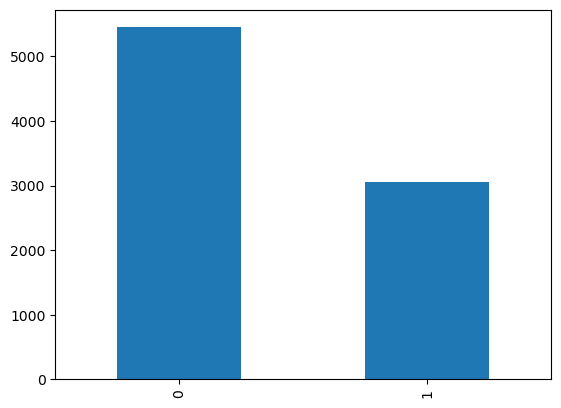

In [4]:
train["label"].value_counts().plot(kind="bar")

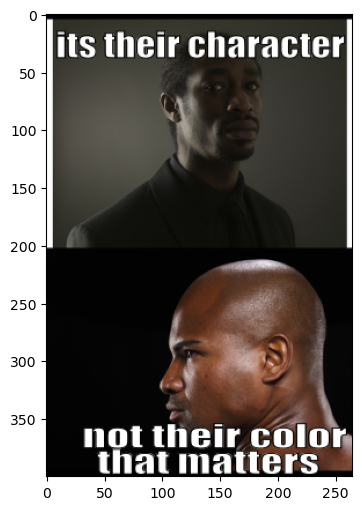

In [5]:
plt.figure(figsize=(10,6))
img = plt.imread(r"C:\Users\matta\hatefulmeme\hatefulmeme\data\img\42953.png")
plt.imshow(img)

# Text Preprocessing

In [6]:
class text_preprocessing:
    def spacy_tokenizer(self,trained_nlp,document):
        '''
        Spacy tokenizer splits a text into individual tokens, 
        and removes punctuation marks, whitespace characters, 
        and brackets from the tokens to extract only the essential words
        and phrases for analysis or modeling.
        '''
        raw_document = trained_nlp(document)
        tokenized_document = []     #initalizing a empty list 
        for token in raw_document:    
            if token.is_punct or token.is_space or token.is_bracket:      #checking for punctuation marks, whitespace characters,and brackets
              continue
            token=token.lemma_                             #here we are doing lemmetization
            tokenized_document.append(token.lower())       #inserting tokens in the list 
        return tokenized_document            
    
    def gensim_word2vec_vectorizer(self,pretrained_model,tokenized_document):
            '''
            In average word2vec, each word in a sentence is represented by a vector, 
            and the sentence is represented by the average of these vectors 
            '''
            vec_size = pretrained_model.vector_size   #getting the vector size in pretrained model
            vectorized_document = np.zeros(vec_size) # take a vector consisting '0s' having size vec_size
            count = 1 
            for token in tokenized_document:
                if token in pretrained_model:
                    count+=1
                    vectorized_document += pretrained_model[token]       #adding vectors 
            vectorized_document = vectorized_document/count              #taking average 
            return vectorized_document 
        

# Spacy for Tokenization

In [7]:
import spacy
text_model = text_preprocessing()
spacy_nlp = spacy.load("en_core_web_lg")

In [8]:
train['tokenized_text'] = train['text'].apply(lambda doc: text_model.spacy_tokenizer(spacy_nlp, doc))

# Converting tokens to vectors

In [9]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
pretrained_path = r"C:\Users\matta\Dropbox\PC\Downloads\GoogleNews\GoogleNews-vectors-negative300.bin"
google_word2vec = KeyedVectors.load_word2vec_format(pretrained_path, binary = True)

C:\Users\matta\anaconda3\envs\MachineLearning\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [10]:
train['vectorized_text']= train['tokenized_text'].apply(lambda doc: text_model.gensim_word2vec_vectorizer(google_word2vec,doc))

In [11]:
train

,id,img,label,text,tokenized_text,vectorized_text
0,42953,img/42953.png,0,its their character not their color that matters,"[its, their, character, not, their, color, tha...","[0.06541273328993055, 0.06890190972222222, 0.0..."
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,"[do, not, be, afraid, to, love, again, everyon...","[0.052828275240384616, -0.0007418118990384615,..."
2,13894,img/13894.png,0,putting bows on your pet,"[put, bow, on, your, pet]","[0.041295369466145836, 0.0703125, -0.034447987..."
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,"[i, love, everything, and, everybody, except, ...","[-0.02905828302556818, -0.04905007102272727, -..."
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...","[everybody, love, chocolate, chip, cookie, eve...","[-0.02508544921875, -0.07933807373046875, 0.10..."
...,...,...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me,"[nobody, want, to, hang, auschwitz, i]","[0.02451171875, 0.003759765625, 0.00537109375,..."
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...,"[when, god, grant, you, a, child, after, 20, y...","[0.111480712890625, 0.016265869140625, 0.01145..."
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...,"[gay, on, social, medium, equality, body, posi...","[0.0117333984375, -0.0223388671875, 0.01815429..."
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...,"[have, a, bad, day, you, could, be, a, siamese...","[0.005663001019021739, 0.01009468410326087, 0...."


# Saving data to a csv file

In [12]:
train.to_csv("Text-Embeddings.csv")

In [13]:
val['tokenized_text']=val['text'].apply(lambda doc: text_model.spacy_tokenizer(spacy_nlp,doc))
val['vectorized_text']=val['tokenized_text'].apply(lambda doc: text_model.gensim_word2vec_vectorizer(google_word2vec,doc))

In [14]:
val

,id,img,label,text,tokenized_text,vectorized_text
0,8291,img/08291.png,1,white people is this a shooting range,"[white, people, be, this, a, shooting, range]","[0.035313197544642856, 0.07085309709821429, 0...."
1,46971,img/46971.png,1,bravery at its finest,"[bravery, at, its, fine]","[0.0788818359375, 0.0462158203125, 0.068603515..."
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...,"[your, order, come, to, $, 37.50, and, your, w...","[0.08218149038461539, 0.019484299879807692, 0...."
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...,"[it, be, time, to, send, these, parasite, back...","[-0.00723876953125, 0.09640026092529297, 0.034..."
4,80243,img/80243.png,1,mississippi wind chime,"[mississippi, wind, chime]","[0.04193115234375, -0.02789306640625, -0.06564..."
...,...,...,...,...,...,...
495,83675,img/83675.png,0,i'm gonna be like phelps one day,"[i, be, go, to, be, like, phelp, one, day]","[-0.088775634765625, -0.0079345703125, 0.06241..."
496,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...,"[when, you, be, so, relaxed, you, can, feel, y...","[0.051060267857142856, 0.01404571533203125, 0...."
497,48670,img/48670.png,0,look at this sandwich maker club i found on wi...,"[look, at, this, sandwich, maker, club, i, fin...","[-0.04459322415865385, 0.0006948617788461539, ..."
498,9863,img/09863.png,0,diverse group of women,"[diverse, group, of, woman]","[-0.0120849609375, 0.0191802978515625, -0.0631..."


In [15]:
val.to_csv("Text-Embeddings_validation.csv")

# Visualizing the ratio of categories in dataset

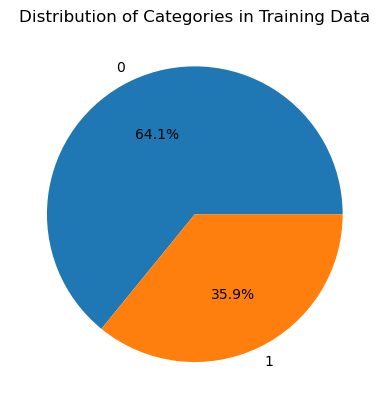

In [16]:
# Count the number of occurrences of each category in the training data
train_counts = train["label"].value_counts()

# Plot the counts as a pie chart
fig, ax = plt.subplots()
ax.pie(train_counts, labels=train_counts.index, autopct='%1.1f%%')
ax.set_title("Distribution of Categories in Training Data")

plt.show()

# Removing Non English words from data

In [17]:
import nltk

def english_word_filter(sent):
    words = set(nltk.corpus.words.words())

    #sent = "Io andiamo to the beach with my amico."
    #sent="Bonjour! Comment ça va? I'm doing well, thank you. What about you?"

    text=" ".join(w for w in nltk.wordpunct_tokenize(sent) \

             if w.lower() in words or not w.isalpha())
    
    return text

In [18]:
examples = ["Hola! I went to the marché to buy some fruits and vegetables",
"Je suis très fatigué today, I think I need a nap",
"Мой лучший друг is coming to visit me from Russia next week",
"Ich bin so aufgeregt! Tomorrow I'm going to see my favorite band live in concert",
"Mijn vrienden and I are planning a trip to Italy this summer",
"Jeg har lyst til å lære meg å spille gitar, it's been a dream of mine for years",
"Mi familia and I went to the beach for vacation last month, it was so much fun",
"O café da manhã is my favorite meal of the day, especially when I have some croissants",
"Ich spreche ein bisschen Deutsch, but I'm not very good at it yet",
"Mi hermano mayor is getting married next month, and I'm going to be the best man"]

for example in examples:
    filtered_text = english_word_filter(example)
    print(f"Original Text: {example}")
    print(f"Filtered Text: {filtered_text}")
    print("\n")

Original Text: Hola! I went to the marché to buy some fruits and vegetables
Filtered Text: ! I went to the to buy some and


Original Text: Je suis très fatigué today, I think I need a nap
Filtered Text: today , I think I need a nap


Original Text: Мой лучший друг is coming to visit me from Russia next week
Filtered Text: is coming to visit me from Russia next week


Original Text: Ich bin so aufgeregt! Tomorrow I'm going to see my favorite band live in concert
Filtered Text: Ich bin so ! Tomorrow I ' m going to see my favorite band live in concert


Original Text: Mijn vrienden and I are planning a trip to Italy this summer
Filtered Text: and I are a trip to this summer


Original Text: Jeg har lyst til å lære meg å spille gitar, it's been a dream of mine for years
Filtered Text: til , it ' s been a dream of mine for


Original Text: Mi familia and I went to the beach for vacation last month, it was so much fun
Filtered Text: Mi familia and I went to the beach for vacation last month

In [19]:
nltk.download('words')

[nltk_data] Error loading words: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [20]:
from langdetect import detect

def filter_english(text):
    """
    Function to remove non-English words from a text
    """
    words = text.split()
    english_words = [word for word in words if word.isalpha() and detect(word) == 'en']
    return " ".join(english_words)

In [21]:
examples = ["Hola! I went to the marché to buy some fruits and vegetables.",
"Je suis très fatigué today, I think I need a nap.",
"Мой лучший друг is coming to visit me from Russia next week.",
"Ich bin so aufgeregt! Tomorrow I'm going to see my favorite band live in concert.",
"Mijn vrienden and I are planning a trip to Italy this summer.",
"Jeg har lyst til å lære meg å spille gitar, it's been a dream of mine for years.",
"Mi familia and I went to the beach for vacation last month, it was so much fun.",
"O café da manhã is my favorite meal of the day, especially when I have some croissants.",
"Ich spreche ein bisschen Deutsch, but I'm not very good at it yet.",
"Mi hermano mayor is getting married next month, and I'm going to be the best man."]

for example in examples:
    filtered_text = filter_english(example)
    print(f"Original Text: {example}")
    print(f"Filtered Text: {filtered_text}")
    print("\n")

Original Text: Hola! I went to the marché to buy some fruits and vegetables.
Filtered Text: to the to and


Original Text: Je suis très fatigué today, I think I need a nap.
Filtered Text: think


Original Text: Мой лучший друг is coming to visit me from Russia next week.
Filtered Text: to from


Original Text: Ich bin so aufgeregt! Tomorrow I'm going to see my favorite band live in concert.
Filtered Text: Tomorrow to


Original Text: Mijn vrienden and I are planning a trip to Italy this summer.
Filtered Text: and to this


Original Text: Jeg har lyst til å lære meg å spille gitar, it's been a dream of mine for years.
Filtered Text: of


Original Text: Mi familia and I went to the beach for vacation last month, it was so much fun.
Filtered Text: and to the beach


Original Text: O café da manhã is my favorite meal of the day, especially when I have some croissants.
Filtered Text: of the when


Original Text: Ich spreche ein bisschen Deutsch, but I'm not very good at it yet.
Filtered Tex

In [22]:
!pip install contractions

In [23]:
import re
from bs4 import BeautifulSoup
import contractions
import nltk


# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    # Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Replace abbreviations with their full form using contractions package
    text = contractions.fix(text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Replace chat words with their full form
    chat_words_map = {
        "afaik": "as far as i know",
        "b4": "before",
        "b/c": "because",
        "btw": "by the way",
        "cya": "see you",
        "lol": "laugh out loud",
        "np": "no problem",
        "omg": "oh my god",
        "thx": "thanks",
        "ttyl": "talk to you later",
        "wtf": "what the fuck",
        "yolo": "you only live once",
        "brb": "be right back",
        "rofl": "rolling on the floor laughing",
        "gtg": "got to go",
        "ex":"previous girlfriend",
        "idk": "i do not know",
        "imo": "in my opinion"
    }
    
    words = text.split()
    new_words = []
    for word in words:
        if word.lower() in chat_words_map:
            new_words.append(chat_words_map[word.lower()])
        else:
            new_words.append(word)
    text = " ".join(new_words)
    return text

# Apply the function to the text in the dataframe
train['text'] = train['text'].apply(preprocess_text)
val['text'] = val['text'].apply(preprocess_text)

C:\Users\matta\anaconda3\envs\MachineLearning\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [24]:
train.iloc[1]['text']

'do not be afraid to love again everyone is not like your previous girlfriend'

In [25]:
!pip install emoji

In [26]:
import emoji

def convert_emoji_to_text(text):
    # Replace emojis with their textual representation
    text = emoji.demojize(text, delimiters=(" ", " "))
    
    # Remove the colons that separate emoji codepoints
    text = text.replace(":", "")
    text = text.replace("_", " ")
    
    return text


train['text'] = train['text'].apply(convert_emoji_to_text)
val['text'] = val['text'].apply(convert_emoji_to_text)

In [27]:
text_with_emoji = "I'm feeling 😊 today!"
text_without_emoji = convert_emoji_to_text(text_with_emoji)
print(text_without_emoji)

I'm feeling  smiling face with smiling eyes  today!


In [28]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define a function to lemmatize text using spaCy
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)
    
# Apply the lemmatization function to the 'text' column of the dataframe
train['text'] = train['text'].apply(lemmatize_text)
val['text'] = val['text'].apply(lemmatize_text)

# Tokenization after removing non english words

In [29]:
from nltk.tokenize import word_tokenize

train['tokenized_text'] = train['text'].apply(word_tokenize)
val['tokenized_text'] = val['text'].apply(word_tokenize)

In [30]:
train

,id,img,label,text,tokenized_text,vectorized_text
0,42953,img/42953.png,0,its their character not their color that matter,"[its, their, character, not, their, color, tha...","[0.06541273328993055, 0.06890190972222222, 0.0..."
1,23058,img/23058.png,0,do not be afraid to love again everyone be not...,"[do, not, be, afraid, to, love, again, everyon...","[0.052828275240384616, -0.0007418118990384615,..."
2,13894,img/13894.png,0,put bow on your pet,"[put, bow, on, your, pet]","[0.041295369466145836, 0.0703125, -0.034447987..."
3,37408,img/37408.png,0,I love everything and everybody except for squ...,"[I, love, everything, and, everybody, except, ...","[-0.02905828302556818, -0.04905007102272727, -..."
4,82403,img/82403.png,0,everybody love chocolate chip cookie even hitler,"[everybody, love, chocolate, chip, cookie, eve...","[-0.02508544921875, -0.07933807373046875, 0.10..."
...,...,...,...,...,...,...
8495,10423,img/10423.png,1,nobody want to hang auschwitz I,"[nobody, want, to, hang, auschwitz, I]","[0.02451171875, 0.003759765625, 0.00537109375,..."
8496,98203,img/98203.png,1,when god grant you a child after 20 year of yo...,"[when, god, grant, you, a, child, after, 20, y...","[0.111480712890625, 0.016265869140625, 0.01145..."
8497,36947,img/36947.png,1,gay on social medium equality body positivity ...,"[gay, on, social, medium, equality, body, posi...","[0.0117333984375, -0.0223388671875, 0.01815429..."
8498,16492,img/16492.png,1,have a bad day you could be a siamese twin att...,"[have, a, bad, day, you, could, be, a, siamese...","[0.005663001019021739, 0.01009468410326087, 0...."


# Vectorization

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data
vectorizer.fit(train['text'])

# Transform the training data into a sparse matrix of TF-IDF weights
X_train_tfidf = vectorizer.transform(train['text'])
X_val_tfidf = vectorizer.transform(val['text'])

In [32]:
train_tfidf = train.copy()
val_tfidf = val.copy()

In [33]:
train_tfidf['tf_idf_matrix'] = list(X_train_tfidf)
val_tfidf['tf_idf_matrix'] = list(X_val_tfidf)

In [34]:
train_tfidf.to_csv("Train-Text-TFIDF-Embeddings.csv", index = False)
val_tfidf.to_csv("Val-Text-TFIDF-Embeddings.csv", index = False)

In [35]:
train_tfidf.head()

,id,img,label,text,tokenized_text,vectorized_text,tf_idf_matrix
0,42953,img/42953.png,0,its their character not their color that matter,"[its, their, character, not, their, color, tha...","[0.06541273328993055, 0.06890190972222222, 0.0...","(0, 6508)\t0.5497218895360637\n (0, 6502)\t..."
1,23058,img/23058.png,0,do not be afraid to love again everyone be not...,"[do, not, be, afraid, to, love, again, everyon...","[0.052828275240384616, -0.0007418118990384615,...","(0, 7270)\t0.17498909697601167\n (0, 6600)\..."
2,13894,img/13894.png,0,put bow on your pet,"[put, bow, on, your, pet]","[0.041295369466145836, 0.0703125, -0.034447987...","(0, 7270)\t0.2419409721304303\n (0, 5275)\t..."
3,37408,img/37408.png,0,I love everything and everybody except for squ...,"[I, love, everything, and, everybody, except, ...","[-0.02905828302556818, -0.04905007102272727, -...","(0, 6180)\t0.7526460821524202\n (0, 3950)\t..."
4,82403,img/82403.png,0,everybody love chocolate chip cookie even hitler,"[everybody, love, chocolate, chip, cookie, eve...","[-0.02508544921875, -0.07933807373046875, 0.10...","(0, 3950)\t0.27431318695484563\n (0, 3167)\..."


# Importing FastText

In [36]:
train_fasttext = train.copy()
val_fasttext = val.copy()

In [37]:
from gensim.models.fasttext import FastText

# train a FastText model on the tokenized text
ft_model = FastText(sentences=train['tokenized_text'], vector_size=100, window=5, min_count=5, workers=4)

# create a function to convert a list of tokens to a single vector using the trained FastText model
def text_to_vector(tokens):
    # create an empty array to store the vectors for each token
    token_vectors = np.empty((len(tokens), ft_model.vector_size))
    
    # iterate through each token and get its vector
    for i, token in enumerate(tokens):
        token_vectors[i] = ft_model.wv[token]
    
    # take the mean of all token vectors to get a single vector representing the text
    text_vector = token_vectors.mean(axis=0)
    
    return text_vector

# apply the text_to_vector function to the tokenized_text column to create a new column with text vectors
train_fasttext['fasttext_vectors'] = train['tokenized_text'].apply(text_to_vector)
val_fasttext['fasttext_vectors'] = val['tokenized_text'].apply(text_to_vector)

In [38]:
train_fasttext.to_csv("Train-Text-FastText-Embeddings.csv", index = False)
val_fasttext.to_csv("Val-Text-FastText-Embeddings.csv", index = False)

# Image Preprocessing

In [39]:
import torch
from torchsummary import summary

In [40]:
class config:
    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    IMG_SIZE = (224, 224)
    IMG_DIR = r'C:\Users\matta\hatefulmeme\hatefulmeme\data'
    TRAIN_LABELS = r"C:\Users\matta\hatefulmeme\hatefulmeme\data\train.jsonl"
    VAL_LABELS = r"C:\Users\matta\hatefulmeme\hatefulmeme\data\dev.jsonl"
    BATCH_SIZE = 32 
    NUM_CLASSES = 2
    FREEZE_CNN = True

In [41]:
import torchvision.transforms as T

class ImagePreprocessing:
    
    def __init__(self, img_size, ocr_pipeline):
        self.img_size = img_size
        self.ocr = ocr_pipeline
    
    def __call__(self, img):
        mask = np.zeros(img.shape[:2], dtype="uint8")
        result = self.ocr.readtext(img, paragraph = True)
        for (box, text) in result:
            (tl, tr, br, bl) = box
            x0, y0 = (int(tl[0]), int(tl[1]))
            x1, y1 = (int(br[0]), int(br[1])) 
            x2, y2 = (int(tr[0]), int(tr[1]))
            x3, y3 = (int(bl[0]), int(bl[1])) 

            x_mid0, y_mid0 = self.midpoint(x1, y1, x2, y2)
            x_mid1, y_mi1 = self.midpoint(x0, y0, x3, y3)

            thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

            cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
            thickness)
            img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = torch.tensor(img)
        img = img.permute(2, 0, 1) / 255.0
        preprocess = T.Compose([
           T.Resize(self.img_size),
        ])
        
        img = preprocess(img)
        return img
    
    
    def midpoint(self, x1, y1, x2, y2):
        x_mid = int((x1 + x2)/2)
        y_mid = int((y1 + y2)/2)
        return (x_mid, y_mid)


In [42]:
def displayImages(img_dir, img_ids, ocr_pipeline):
 #to display images before and after processing   
    plt.figure(figsize = (15,8))
    idx = 1
    for img_id in img_ids:
        
        img_path = os.path.join(img_dir, img_id)
        plt.subplot(len(img_ids), 2, idx)
        img = cv2.imread(img_path)
        img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img1)
        plt.title("Before Preprocessing")
        plt.axis(False)

        idx += 1
        plt.subplot(len(img_ids), 2, idx)
        preprocessor = ImagePreprocessing((img.shape[0], img.shape[1]), ocr_pipeline)
        processed_img = preprocessor(img).permute(1,2,0)
        plt.imshow(processed_img)
        plt.title("After Preprocessing")
        plt.axis(False)
        idx += 1
    plt.subplots_adjust(top=0.90, bottom = -0.5, left = 0.3)

In [43]:
!pip install easyocr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\matta\anaconda3\envs\MachineLearning\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


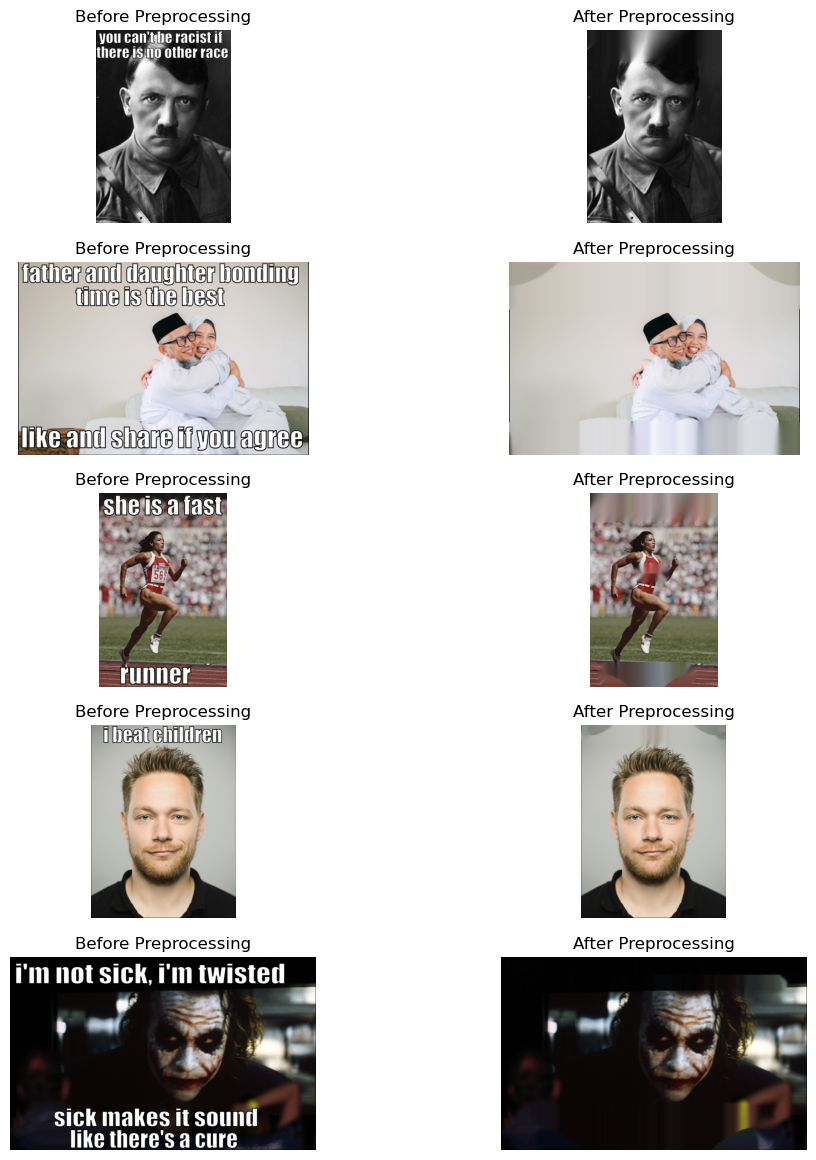

In [44]:
import easyocr
import math
import cv2
import os
img_ids = ["01247.png", "01268.png", "01756.png", "01794.png", "01327.png"]
img_dir = r"C:\Users\matta\hatefulmeme\hatefulmeme\data\img"
reader = easyocr.Reader(['en']) 
# Easyocr is used to remove or extract text from images
displayImages(img_dir, img_ids, reader)

In [45]:
from torchvision.io import read_image

class CustomDataset(torch.utils.data.Dataset):
    
    def __init__(self, img_dir, labels_file, transform = None):
        
        self.img_dir = img_dir
        self.labels = pd.read_json(labels_file, lines = True)
        self.transform = transform
    
    def __getitem__(self, idx):
        
        img_path = os.path.join(self.img_dir, self.labels.loc[idx, 'img'])
        img = cv2.imread(img_path)
        label = self.labels.loc[idx, 'label']
        
        if self.transform is not None:
            img = self.transform(img)
        
        return img, label
    
    def __len__(self):
        return len(self.labels)

In [46]:
reader = easyocr.Reader(['en']) 

transformations = ImagePreprocessing(config.IMG_SIZE, reader)

train_dataset = CustomDataset(config.IMG_DIR, config.TRAIN_LABELS, transformations)

val_dataset = CustomDataset(config.IMG_DIR, config.VAL_LABELS, transformations)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [47]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = config.BATCH_SIZE, shuffle = False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = config.BATCH_SIZE, shuffle = False)

# VGG19 for Image Classification and Feature Extraction

In [48]:
class CustomVGG19(torch.nn.Module):
    
    def __init__(self, num_class, freeze_cnn):
        super().__init__()
        self.num_class = num_class
        self.freeze_cnn = freeze_cnn
        self.vgg19 = models.vgg19(pretrained = True)
        self.fine_tune = nn.Sequential(nn.Linear(in_features=25088, out_features=4096, bias=True),
                                         nn.ReLU(inplace=True),
                                         nn.Dropout(p=0.5, inplace=False),
                                         nn.Linear(in_features=4096, out_features=1024, bias=True),
                                         nn.ReLU(inplace=True),
                                         nn.Dropout(p=0.5, inplace=False),
                                         nn.Linear(in_features=1024, out_features=512, bias=True),
                                         nn.ReLU(inplace=True),
                                         nn.Dropout(p=0.2, inplace=False),
                                         nn.Linear(in_features=512, out_features=100, bias=True),
                                         nn.ReLU(inplace=True),
                                         nn.Linear(in_features=100, out_features=self.num_class, bias=True))
        self.vgg19.classifier = self.fine_tune

        
    def forward(self, x):
        
        if self.freeze_cnn:
            self.vgg19.features.requires_grad_ = False

        return self.vgg19(x)

In [49]:
import torchvision.models as models
from torch import nn
import time
import copy
vgg19 = CustomVGG19(config.NUM_CLASSES, config.FREEZE_CNN).to(config.DEVICE)
print(vgg19.vgg19)

C:\Users\matta\anaconda3\envs\MachineLearning\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\matta\anaconda3\envs\MachineLearning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [50]:
summary(vgg19.vgg19, (3, *config.IMG_SIZE)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [51]:
class modelConfig:
    LR = 0.001
    MOMENTUM = 0.9
    GAMMA = 0.1
    STEP_SIZE = 7
    BATCH_SIZE = 32
    EPOCHS = 2

In [52]:
from torch import optim

# Loss Function for the model
criterion = nn.CrossEntropyLoss().to(config.DEVICE)

In [53]:
# List of all non freezed parameters
non_frozen_parameters = [p for p in vgg19.parameters() if p.requires_grad]
# Observe that all parameters are being optimized
optimizer = optim.SGD(non_frozen_parameters, lr = modelConfig.LR, momentum = modelConfig.MOMENTUM)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = modelConfig.STEP_SIZE, 
                                             gamma = modelConfig.GAMMA)

In [54]:
from tqdm import tqdm
def train_model(model, trainloader, criterion, optimizer, scheduler, num_epochs):
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        model.train()  # Set model to training mode
        running_loss = 0.0
        running_corrects = 0
        # Iterate over data.
        for inputs, labels in tqdm(trainloader):
            inputs = inputs.to(config.DEVICE)
            labels = labels.to(config.DEVICE)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward
            # track history if only in train
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            # backward + optimize only if in training phase
            loss.backward()
            optimizer.step()
            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            # To save GPU memory
            del inputs
        scheduler.step()
        dataset_sizes = len(trainloader)
        epoch_loss = running_loss / dataset_sizes
        epoch_acc = running_corrects.double() / dataset_sizes
        print('Loss: {:.4f} Acc: {:.4f}'.format(
            epoch_loss, epoch_acc))
    
    return model, optimizer

In [55]:
vgg19_trained, optimizer_after_train = train_model(vgg19, train_loader, criterion, optimizer, 
                                                   exp_lr_scheduler, num_epochs = modelConfig.EPOCHS)

Epoch 0/1
----------


  0%|                                                                                          | 0/266 [00:00<?, ?it/s]C:\Users\matta\anaconda3\envs\MachineLearning\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 266/266 [17:05:10<00:00, 231.24s/it]


Loss: 21.0897 Acc: 20.0414
Epoch 1/1
----------


100%|██████████████████████████████████████████████████████████████████████████████| 266/266 [7:03:19<00:00, 95.49s/it]

Loss: 20.6947 Acc: 20.4887


In [56]:
model_state_dicts = {"model" : vgg19_trained.state_dict(), 
                     "optimizer" : optimizer_after_train.state_dict()}
torch.save(model_state_dicts, "vgg19-fine-tuned.pt")

In [57]:
def makeEmbeddingModel(vgg19_trained, dim = 100):
    
    # Remove last 2 layers to get the 100 dim embedding
    model = copy.deepcopy(vgg19_trained)
    if dim == 100:
        for _ in range(2):
            temp = model.vgg19.classifier.pop(-1)
    
    elif dim == 512:
        for _ in range(5):
            temp = model.vgg19.classifier.pop(-1)
    else:
        print("You could only choose 100 or 512 dimenssional embeddings")
    
    return model

In [59]:
embedding_model = makeEmbeddingModel(vgg19_trained, 100)
embedding_model.vgg19


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [60]:
from torchvision.io import read_image
import torch

class InferenceDataset(torch.utils.data.Dataset):
    
    def __init__(self, img_dir, labels_file, transform = None):
        
        self.img_dir = img_dir
        self.labels = pd.read_json(labels_file, lines = True)
        self.transform = transform
    
    def __getitem__(self, idx):
        
        img_path = os.path.join(self.img_dir, self.labels.loc[idx, 'img'])
    
        img = cv2.imread(img_path)
        label = self.labels.loc[idx, 'label']
        id_ = self.labels.loc[idx, 'id']
        
        if self.transform is not None:
            img = self.transform(img)
        
        return img, label, id_, self.labels.loc[idx, 'img']
    
    def __len__(self):
        return len(self.labels)

In [61]:
reader = easyocr.Reader(['en']) 

transformations = ImagePreprocessing(config.IMG_SIZE, reader)

train_dataset_emb = InferenceDataset(config.IMG_DIR, config.TRAIN_LABELS, transformations)
val_dataset_emb = InferenceDataset(config.IMG_DIR, config.VAL_LABELS, transformations)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [62]:
train_loader_emb = torch.utils.data.DataLoader(train_dataset_emb, batch_size = config.BATCH_SIZE, shuffle = False)
val_loader_emb = torch.utils.data.DataLoader(val_dataset_emb, batch_size = config.BATCH_SIZE, shuffle = False)

In [63]:
def getEmbeddings(model, emb_loader):
    model.eval()  # Set model to training mode
    # Iterate over data.
    df = pd.DataFrame()
    for inputs, labels, ids, img_paths in tqdm(emb_loader):
        inputs = inputs.to(config.DEVICE)
        embedding = model(inputs)
        temp = pd.DataFrame({"id" : ids.tolist(), "img" : img_paths, 
                             "label" : labels.tolist(), 
                             "image_embeddings" : [np.float32(i) for i in embedding.tolist()]})
        df = df.append(temp, ignore_index = True)
        # To Save Memory
        del inputs, labels, ids, img_paths
    return df

In [64]:
df = getEmbeddings(embedding_model.to(config.DEVICE), train_loader_emb)

  0%|                                                                                          | 0/266 [00:00<?, ?it/s]C:\Users\matta\anaconda3\envs\MachineLearning\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
C:\Users\matta\AppData\Local\Temp\ipykernel_18004\979909183.py:11: FutureWarning: The frame.append method is deprecated and will be removed fr

In [65]:
df.to_csv("Image-Embedding.csv")